In [1]:
import numpy as np
import scipy
import sklearn
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'Greys'
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False



import sys,os,pdb,copy,pickle
from importlib import reload
# import pynapple as nap

sys.path.append('/mnt/home/szheng/projects/seq_detection2/code')
sys.path.append('/mnt/home/szheng/projects/util_code')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis/scripts')
sys.path.append('/mnt/home/szheng/projects/cluster_spikes')
sys.path.append('/mnt/home/szheng/projects/place_variability/code')
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
import preprocess as prep
import nmf_analysis as na
import nmf_plot as nmfp
reload(na)

import raster_new as rn
import data_prep_pyn as dpp


import change_point_analysis as cpa
import change_point_plot as cpp

import place_field_analysis as pf

import switch_analysis_one_session as saos
reload(saos)

import process_central_arm as pca 
import change_point_analysis_central_arm_seperate as cpacas

import misc
reload(misc)
from misc import get_nth_key, get_nth_val

67 sessions!
67 sessions!


In [201]:
import matplotlib.pyplot as plt

# Set default figure size
plt.rcParams['figure.figsize'] = (6, 4)  # width, height in inches

# Set default font sizes
plt.rcParams['font.size'] = 10  # Default font size
plt.rcParams['axes.titlesize'] = 10  # Title font size
plt.rcParams['axes.labelsize'] = 10  # Label font size
plt.rcParams['xtick.labelsize'] = 10  # x-axis tick label font size
plt.rcParams['ytick.labelsize'] = 10  # y-axis tick label font size
plt.rcParams['legend.fontsize'] = 10  # Legend font size
mpl.rcParams['image.cmap'] = 'viridis'
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

In [202]:
import matplotlib
matplotlib.rcParams['svg.fonttype'] = 'none'

In [4]:

figdir = '/mnt/home/szheng/ceph/place_variability/fig/paper/figure_continuous_vs_discrete'
misc.get_or_create_subdir(figdir)
data_dir = '/mnt/home/szheng/ceph/place_variability/data/paper'
misc.get_or_create_subdir(data_dir)


'/mnt/home/szheng/ceph/place_variability/data/paper'

In [5]:
import database
db = database.db

subdb = db.query('owner=="roman"').sort_values('n_pyr_putative',ascending=False)
subdb = subdb.query('ntrials>=20&n_neurons>=50')
to_exclude_sess = ['e16_3m2_211211']
subdb=subdb.loc[~subdb['sess_name'].isin(to_exclude_sess)]


import pf_recombine_central as pfrc
import fr_map_one_session as fmos
import switch_detection_one_session as sdos
import get_all_switch_add_metrics as gasam

import preprocess_one_session as prepos

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [6]:
fn = 'prepped_data_agg.p'
fn_full = os.path.join(data_dir,fn)
prepped_data_agg = pickle.load(open(fn_full,'rb'))

all_fields_recombined_all = prepped_data_agg['all_fields_recombined_all']
pf_params_recombined_all=  prepped_data_agg['pf_params_recombined_all']
fr_map_trial_df_all= prepped_data_agg['fr_map_trial_df_all']
occu_map_all = prepped_data_agg['occu_map_all']
fr_map_all = prepped_data_agg['fr_map_all']

pval_all = prepped_data_agg['pval_all']
X_pwc_all = prepped_data_agg['X_pwc_all']
X_raw_all = prepped_data_agg['X_raw_all']
changes_df_all = prepped_data_agg['changes_df_all']
var_res_all_test = prepped_data_agg['var_res_all']
# corr_all = prepped_data_agg['corr_all']
all_sw_d_all = prepped_data_agg['all_sw_d_all']
all_sw_with_metrics_d_all = prepped_data_agg['all_sw_with_metrics_d_all']
best_n_all_test = prepped_data_agg['best_n_all']
spk_beh_df_all = prepped_data_agg['spk_beh_df_all']

# pf_params_all = prepped_data_agg['pf_params_all']
# all_fields_all = prepped_data_agg['all_fields_all']

ntrials_per_tt=fr_map_trial_df_all.groupby(level=(0,1,2,3)).apply(lambda x:x.dropna(axis=1,how='all').shape[1])
ntrials_mask = ntrials_per_tt.groupby(level=(0,1,2)).apply(lambda x:(x>=7).all()) 



In [7]:
savefn_full = os.path.join(data_dir,'per_field_metrics_shtest_with_1cp.p')
# pickle.dump(per_field_metrics_all,open(savefn_full,'wb'))
per_field_metrics_all=pickle.load(open(savefn_full,'rb'))

# fit all sessions

In [8]:
import step_vs_gradual_analysis as svga
reload(svga)

<module 'step_vs_gradual_analysis' from '/mnt/home/szheng/projects/place_variability/code/step_vs_gradual_analysis.py'>

In [21]:
%%time
gpb = X_raw_all.groupby(level=(0,1,2,3),sort=False)
r2_df_d_all = []
for k,val in gpb:
    r2_df_d = svga.fit_poly_regress_cpd_get_r2_all_multi_order(val,cost='l2',min_size=2,ncpt_max=5)
#     r2_df_d_all[k] = r2_df_d
    r2_df_d_all.append(r2_df_d) 
r2_df_d_all = pd.concat(r2_df_d_all,axis=0)

CPU times: user 3min 40s, sys: 47.7 ms, total: 3min 40s
Wall time: 3min 40s


In [32]:
# r2_df_d_all=r2_df_d_all.droplevel((0,1,2,3))

In [10]:
fn_full = os.path.join(data_dir,'poly_regression_vs_step_r2_all.p')
# pickle.dump(r2_df_d_all,open(fn_full,'wb'))
r2_df_d_all = pickle.load(open(fn_full,'rb'))

/tmp/ipykernel_2060823/1321363207.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=8)
/tmp/ipykernel_2060823/1321363207.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_xticklabels(),fontsize=8)


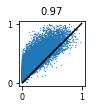

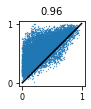

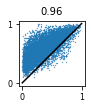

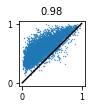

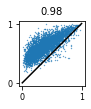

In [71]:
# fig,axs=plt.subplots(5,1,figsize=(4,20))
dosave = True
for ii,order in enumerate(r2_df_d_all.columns.get_level_values(0).unique()):
#     fig,ax=plt.subplots(figsize=(3,3))
    fig,ax=plt.subplots(figsize=(1.2,1.2))
    ax.set_aspect('equal')
    ax.scatter(r2_df_d_all.loc[:,(order,'reg')],r2_df_d_all.loc[:,(order,'step')],s=0.1,marker='o')
    frac_step_larger=(r2_df_d_all.loc[:,(order,'step_minus_reg')].dropna() > 0).mean()
    ax.plot([0,1],[0,1],c='k')
#     ax.set_title(f'Num. change point (polynomial order)={order}\nFrac. CPM > regression={frac_step_larger:.2f}')
    # to use the png version, get rid of as much text as possible
#     ax.set_title(f'Frac. (CPM better)={frac_step_larger:.2f}',fontsize=10)
    ax.set_title(f'{frac_step_larger:.2f}',fontsize=10)
    ax.set_xticklabels(ax.get_xticklabels(),fontsize=8)
    ax.set_yticklabels(ax.get_xticklabels(),fontsize=8)
#     ax.set_xlabel('R2 polynomial regression')
#     ax.set_ylabel('R2 change point model')
    if dosave:
        figfn = f'scatter_R2_cpd_vs_polyreg_order{order}'
        ph.save_given_name(fig,figfn,figdir,dpi=900)


# look at one session

In [11]:
ani='e15_13f1'
sess='e15_13f1_220117'
ta,tt = 0,0
X_raw_one = X_raw_all.loc[(ani,sess,ta,tt),:]
X_pwc_one = X_pwc_all.loc[(ani,sess,ta,tt),:]

changes_df_one=changes_df_all.loc[(ani,sess,ta,tt),:]

ma=((changes_df_one==1).sum(axis=1)==1) & ((changes_df_one==-1).sum(axis=1)==1)
ii=0
uid,field_id=changes_df_one.loc[ma].index[ii]

r2_df_d_one = r2_df_d_all.loc[(ani,sess,ta,tt),:]

best_n_one = best_n_all_test.loc[ani,sess,ta,tt]
fr_map_trial_df_one=fr_map_trial_df_all.loc[(ani,sess,ta,tt),:].dropna(axis=1,how='all')
all_fields_one=all_fields_recombined_all.loc[(ani,sess,ta,tt),:]
all_sw_d_one=all_sw_d_all.loc[(ani,sess,ta),:].set_index(['trialtype','uid','field_index']).loc[tt]

/tmp/ipykernel_1153047/1072487391.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  X_raw_one = X_raw_all.loc[(ani,sess,ta,tt),:]
/tmp/ipykernel_1153047/1072487391.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  changes_df_one=changes_df_all.loc[(ani,sess,ta,tt),:]


NameError: name 'r2_df_d_all' is not defined

In [15]:
# add si to all_sw
si_l = []
for i,row in all_sw_with_metrics_d_all.iterrows():
    si_l.append(per_field_metrics_all.loc[(i[0],i[1],i[2],row['trialtype'],row['uid']),:]['si'].mean())
si_l = np.array(si_l)
all_sw_with_metrics_d_all['si'] = si_l

/tmp/ipykernel_2060823/2076179227.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  si_l.append(per_field_metrics_all.loc[(i[0],i[1],i[2],row['trialtype'],row['uid']),:]['si'].mean())


In [16]:
ta=0
all_sw_with_metrics_one=all_sw_with_metrics_d_all.loc[ani,sess,ta]

/tmp/ipykernel_2060823/3875779715.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw_with_metrics_one=all_sw_with_metrics_d_all.loc[ani,sess,ta]


## select examples

In [17]:
# initialize the holder of example indices
tt_uid_field_id_order_l = []

# selecting one ON
ta=0
tt=0
best_n_one = best_n_all_test.loc[ani,sess,ta,tt]
ma=best_n_one==1
ii=0
uid,field_id = best_n_one.index[ma][ii]

tt_uid_field_id_order_l.append((tt,uid,field_id,1))


/tmp/ipykernel_2060823/1711155876.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  best_n_one = best_n_all_test.loc[ani,sess,ta,tt]


In [18]:
# selecting first on then off
si_thresh = 0.5
gpb=all_sw_with_metrics_one.groupby(['trialtype','uid','field_index'])
uid_satisfying_cond = []
for k,val in gpb:
    cond = ((val['switch']==1).sum()==1) & ((val['switch']==-1).sum()==1) & (val['si'].mean() > si_thresh)
    if cond:
        if val.query('switch==1')['trial_index'].iloc[0] < val.query('switch==-1')['trial_index'].iloc[0]:
#             uid_satisfying_cond[k] = val
            uid_satisfying_cond.append(k)
tt,uid,field_id = uid_satisfying_cond[5]
tt_uid_field_id_order_l.append((tt,uid,field_id,2))


In [19]:
# selecting first off then on
si_thresh = 0.5
gpb=all_sw_with_metrics_one.groupby(['trialtype','uid','field_index'])
uid_satisfying_cond = []
for k,val in gpb:
    cond = ((val['switch']==1).sum()==1) & ((val['switch']==-1).sum()==1) & (val['si'].mean() > si_thresh)
    if cond:
        if val.query('switch==1')['trial_index'].iloc[0] > val.query('switch==-1')['trial_index'].iloc[0]:
#             uid_satisfying_cond[k] = val
            uid_satisfying_cond.append(k)
ii=2
tt,uid,field_id = uid_satisfying_cond[ii]
order=2
tt_uid_field_id_order_l.append((tt,uid,field_id,order))


In [20]:
# selecting 3 change points
si_thresh = 0.5
gpb=all_sw_with_metrics_one.groupby(['trialtype','uid','field_index'])
uid_satisfying_cond = []
for k,val in gpb:
    cond = len(val)==3
    if cond:
        uid_satisfying_cond.append(k)
ii=0
tt,uid,field_id = uid_satisfying_cond[ii]
order=3
tt_uid_field_id_order_l.append((tt,uid,field_id,order))


In [68]:
reload(svga)

<module 'step_vs_gradual_analysis' from '/mnt/home/szheng/projects/place_variability/code/step_vs_gradual_analysis.py'>

/tmp/ipykernel_2060823/3725456382.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_fields_recombined = all_fields_recombined_all.loc[ani,sess]
/tmp/ipykernel_2060823/3725456382.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  fr_map_trial_df=fr_map_trial_df_all.loc[(ani,sess),:].dropna(axis=1,how='all')
/tmp/ipykernel_2060823/3725456382.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  X_raw = X_raw_all.loc[(ani,sess),:]
/tmp/ipykernel_2060823/3725456382.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  X_pwc=X_pwc_all.loc[(ani,sess),:]
/tmp/ipykernel_2060823/3725456382.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw_d=all_sw_d_all.loc[(ani,sess),:]
/tmp/ipykernel_2060823/3725456382.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  trial_index_to_index_within_df = dpp.trial_index_to_index_withi

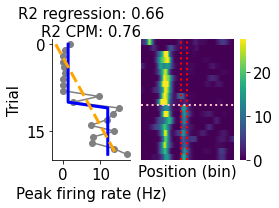

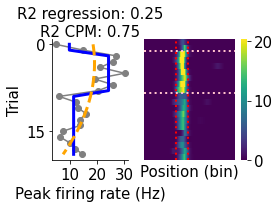

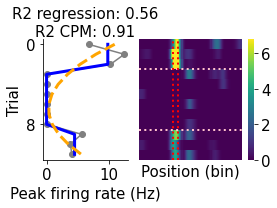

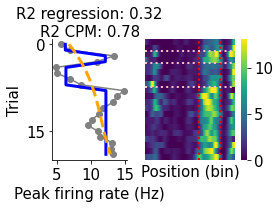

In [69]:
dosave = True
all_fields_recombined = all_fields_recombined_all.loc[ani,sess]
all_fields_row_one=all_fields_recombined.loc[ta,tt,uid,field_id]

fr_map_trial_df=fr_map_trial_df_all.loc[(ani,sess),:].dropna(axis=1,how='all')
X_raw = X_raw_all.loc[(ani,sess),:]
X_pwc=X_pwc_all.loc[(ani,sess),:]
all_sw_d=all_sw_d_all.loc[(ani,sess),:]
trial_index_to_index_within_df = dpp.trial_index_to_index_within_trialtype(spk_beh_df_all.loc[(ani,sess),:])


for (tt,uid,field_id,order) in tt_uid_field_id_order_l:
    fig,axs=svga.fit_plot_step_vs_continuous_example(fr_map_trial_df,
                                            X_raw,X_pwc,all_sw_d,trial_index_to_index_within_df,
                                            all_fields_recombined,
                                            best_n_one,
                                            ncpts=order,ii=None,
                                            ta=ta,tt=tt,min_size=2,
                                                uid=uid,field_id=field_id,
                                                     dosave=dosave,
                                                     figdir=figdir,
                                                     sess=sess,
                                                     figsize=(4,3),
                                                     do_legend=False,
                                           )
    
#     axs[0].legend([]).remove()

# step vs continuous for the pv correlation curve

In [73]:
import pv_corr_analysis as pvca

In [74]:
corr_all=fr_map_trial_df_all.groupby(level=(0,1,2,3)).corr()
mean_corr_all=corr_all.groupby(level=(0,1,2,3)).apply(lambda x:pvca.get_val_per_lag(x).mean(axis=0))
mean_corr_all = mean_corr_all.unstack(level=-1)

In [188]:
reload(svga)

<module 'step_vs_gradual_analysis' from '/mnt/home/szheng/projects/place_variability/code/step_vs_gradual_analysis.py'>

In [75]:
r2_df_pv = svga.fit_poly_regress_cpd_get_r2_all_multi_order(mean_corr_all,cost='l2',min_size=2,ncpt_max=5)

In [78]:
ani='e15_13f1'
sess='e15_13f1_220117'

In [97]:
ta,tt=0,0
xx=mean_corr_all.loc[ani,sess].dropna(axis=1,how='all').loc[ta,tt].values

In [102]:
ncpts = 1
r2_step,xx_hat_step=svga.fit_cpd_get_r2(xx,ncpts,cost='l2',min_size=2)
r2_reg,xx_hat_reg=svga.fit_poly_regress_get_r2(xx,order=ncpts,cost='l2',verbose=True)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     402.3
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           2.86e-13
Time:                        02:16:03   Log-Likelihood:                 49.344
No. Observations:                  19   AIC:                            -94.69
Df Residuals:                      17   BIC:                            -92.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7512      0.008     89.331      0.0

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


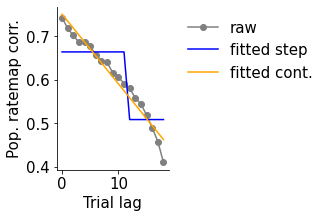

In [119]:
fig,ax=plt.subplots(figsize=(2,3))
ax.plot(xx,label='raw',marker='o',color='grey')
ax.plot(xx_hat_step,label='fitted step',color='blue')
ax.plot(xx_hat_reg, label='fitted cont.',color='orange')
ax.legend(bbox_to_anchor=[1.05,1.],frameon=False)
ax.set_xlabel('Trial lag')
ax.set_ylabel('Pop. ratemap corr.')
sns.despine()
figfn = 'example_pvcorr_vs_triallag_with_step_and_continuous_fit'
ph.save_given_name(fig,figfn,figdir)


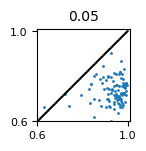

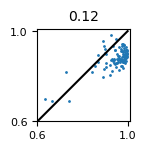

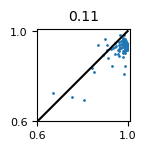

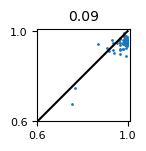

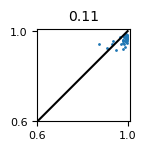

In [76]:
# fig,axs=plt.subplots(5,1,figsize=(4,20))
dosave = True
for ii,order in enumerate(r2_df_pv.columns.get_level_values(0).unique()):
    fig,ax=plt.subplots(figsize=(1.2,1.2))
    ax.set_aspect('equal')
    ax.scatter(r2_df_pv.loc[:,(order,'reg')],r2_df_pv.loc[:,(order,'step')],s=1)
    ax.plot([0.6,1],[0.6,1],color='k')
    ax.set_xlim([0.6,1.01])
    ax.set_ylim([0.6,1.01])
    ax.set_xticks([0.6,1])
    ax.set_yticks([0.6,1])
    
    frac_step_larger = (r2_df_pv.loc[:,(order,'step_minus_reg')].dropna() > 0).mean()
        
#     ax.set_title(f'Num. change point (polynomial order)={order}\nFrac. CPM > regression={frac:.2f}')
#     ax.set_title(f'Frac. (CPM better)={frac_step_larger:.2f}',fontsize=10)
    ax.set_title(f'{frac_step_larger:.2f}',fontsize=10)
    ax.set_xticklabels(ax.get_xticklabels(),fontsize=8)
    ax.set_yticklabels(ax.get_xticklabels(),fontsize=8)
#     ax.set_xlabel('R2 polynomial regression')
#     ax.set_ylabel('R2 change point model')
    if dosave:
        figfn = f'scatter_R2_cpd_vs_polyreg_order{order}_popveccorr'
        ph.save_given_name(fig,figfn,figdir,dpi=900)


# analysis of how many trials it take to switch

## get peri switch trials

In [77]:
reload(svga)

<module 'step_vs_gradual_analysis' from '/mnt/home/szheng/projects/place_variability/code/step_vs_gradual_analysis.py'>

### idea: how many trials are lapsed from the valley pre switch and peak post switch

In [76]:
# ii = 51
# changes_df_row = changes_df_one.iloc[ii].dropna()
# X_raw_row = X_raw_one.iloc[ii].dropna()
# X_pwc_row = X_pwc_one.iloc[ii].dropna()
span_d = svga.get_peri_switch_peak_valley_span(changes_df_row,X_raw_row,X_pwc_row)
peri_sw_x_one=svga.get_peri_switch_x_raw(changes_df_row,X_raw_row,win=10)

> /mnt/home/szheng/projects/place_variability/code/step_vs_gradual_analysis.py(215)get_peri_switch_peak_valley_span()
    213 
    214         pdb.set_trace()
--> 215         ma_pre_nonzero=np.nonzero(ma_pre)[0]
    216         n_trial_between_sw_pre = swiw - ma_pre_nonzero
    217         ma_post_nonzero=np.nonzero(ma_post)[0]

ipdb> n
> /mnt/home/szheng/projects/place_variability/code/step_vs_gradual_analysis.py(216)get_peri_switch_peak_valley_span()
    214         pdb.set_trace()
    215         ma_pre_nonzero=np.nonzero(ma_pre)[0]
--> 216         n_trial_between_sw_pre = swiw - ma_pre_nonzero
    217         ma_post_nonzero=np.nonzero(ma_post)[0]
    218         n_trial_between_sw_post =  ma_post_nonzero - swiw + 1

ipdb> n
> /mnt/home/szheng/projects/place_variability/code/step_vs_gradual_analysis.py(217)get_peri_switch_peak_valley_span()
    215         ma_pre_nonzero=np.nonzero(ma_pre)[0]
    216         n_trial_between_sw_pre = swiw - ma_pre_nonzero
--> 217         ma_post_non

BdbQuit: 

<Axes: >

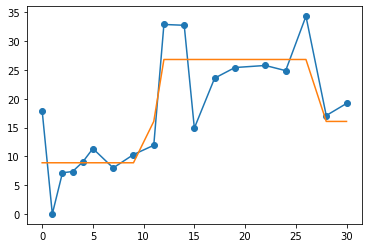

In [65]:
X_raw_row.plot(marker='o')
X_pwc_row.plot()

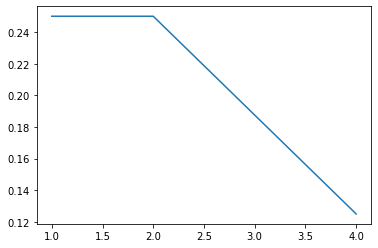

In [78]:
span_d_one = {}
for kk,X_raw_row in X_raw_all.iterrows():
    changes_df_row = changes_df_all.loc[kk].dropna()
    X_raw_row = X_raw_row.dropna()
    if X_pwc_one is not None:
        X_pwc_row = X_pwc_all.loc[kk].dropna()
        span_d = svga.get_peri_switch_peak_valley_span(changes_df_row,X_raw_row,X_pwc_row)
    else:
        span_d = svga.get_peri_switch_peak_valley_span(changes_df_row,X_raw_row)
    span_d_one[kk] = span_d
#     span_d_one = pd.concat(span_d_one).stack().unstack(level=2) # uid,field_id, sw_id
span_d_one = pd.concat(span_d_one).stack()
span_d_one = span_d_one.unstack(level=-2) # turn onoff and trialspan into columns
nlevels=span_d_one.index.nlevels
span_d_one = span_d_one.set_index('onoff',append=True).reorder_levels((-1,*np.arange(nlevels))) # put the onoff level to first    

<Axes: >

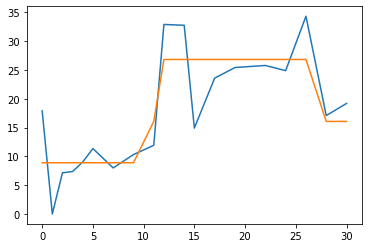

In [61]:
X_raw_row.plot()
X_pwc_row.plot()

In [83]:
span_d_all=span_d_one

In [226]:
reload(svga)

<module 'step_vs_gradual_analysis' from '/mnt/home/szheng/projects/place_variability/code/step_vs_gradual_analysis.py'>

In [227]:
%%time
span_d_all = svga.get_peri_switch_peak_valley_span_all(X_raw_all,changes_df_all,X_pwc_all)
# data_fn=os.path.join(data_dir,'peri_switch_peak_valley_span.p')
data_fn=os.path.join(data_dir,'peri_switch_peak_valley_span_thresholdcross.p')
pickle.dump(span_d_all,open(data_fn,'wb'))

CPU times: user 16.1 s, sys: 23.7 ms, total: 16.2 s
Wall time: 16.2 s


In [80]:
# data_fn=os.path.join(data_dir,'peri_switch_peak_valley_span.p')
# span_d_all=pickle.load(open(data_fn,'rb'))


onoff 1, <=1: 0.5297252972529726
onoff 1, <=2: 0.7720377203772038
onoff 1, <=3: 0.8819188191881919
onoff 1, <=4: 0.941369413694137
onoff -1, <=1: 0.5337965887555275
onoff -1, <=2: 0.7536323436512951
onoff -1, <=3: 0.8768161718256475
onoff -1, <=4: 0.9406190777005685


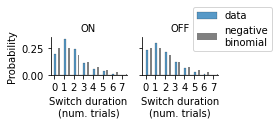

In [253]:
nbin_max = 7
xs=np.arange(0,nbin_max+1)
nbpmf = scipy.stats.nbinom.pmf(k=xs,n=2,p=0.5)

fig,axs=plt.subplots(1,2,figsize=(3,0.7),sharey=True)

for ii,onoff in enumerate([1,-1]):
#     fig=plt.figure(figsize=(3,1))
#     ax=fig.add_subplot(1,2,ii+1)
    ax=axs[ii]
    bins = np.arange(0,9.2,0.2)
    ax=sns.histplot(data=span_d_all.loc[onoff],x='trial span',bins=bins,ax=ax,stat='probability',label='data')
    ax.bar(xs+0.5,nbpmf,width=0.2,label='negative\nbinomial',color='grey')
    sns.despine()
    onoff_str = {1:'ON',-1:'OFF'}[onoff]
    ax.set_title(onoff_str)
    ax.set_xlabel('Switch duration\n(num. trials)')
#     ax.set_xlabel('First passage time\n(num. trials)')
    
#     ax=fig.add_subplot(1,2,2)
#     bins = np.arange(1,11,1)
#     ax=sns.histplot(data=span_d_all.loc[onoff],x='trial span', bins=bins,ax=ax,cumulative=True,stat='probability',fill=False)
    ax.set_xlim([-0.4,7.5])
#     ax.set_xticks([1.5,3.5,5.5])
    ax.set_xticks(xs)
#     ax.set_xticklabels([1,3,5])
#     sns.despine()
#     ax.set_xlabel('Switch duration\n(num. trials)')
#     plt.tight_layout()

    
    for k in range(1,5):
        p=(span_d_all.loc[onoff]['trial span'] <=k).mean()
        print(f'onoff {onoff}, <={k}: {p}')
ax.legend(bbox_to_anchor=[0.6,0.5])
figfn = f'hist_switch_duration_{onoff}_withnull'
ph.save_given_name(fig,figfn,figdir)


In [258]:
span_d_all.loc[span_d_all['trial span'] > 5]

post_n_trial  pre_n_trial  \
onoff                                                                      
 1.0  e13_16f1 e13_16f1_210302 0 0.0  11  0 0           1.0          5.0   
               e13_16f1_210317 0 1.0  83  0 0           1.0          5.0   
               e13_16f1_210319 0 both 38  0 0           6.0          1.0   
               e13_16f1_210322 0 both 97  0 0           5.0          1.0   
-1.0  e13_26m1 e13_26m1_210913 0 0.0  31  0 0           5.0          6.0   
...                                                     ...          ...   
      e16_3m2  e16_3m2_211213  0 1.0  59  3 0           5.0          2.0   
 1.0  e16_3m2  e16_3m2_211213  0 1.0  34  1 0           4.0          2.0   
                                 both 29  0 0           4.0          2.0   
-1.0  e16_3m2  e16_3m2_211213  1 both 151 0 1           4.0          3.0   
 1.0  e16_3m2  e16_3m2_211213  1 both 16  0 0           6.0          1.0   

                                               trial span  
onoff                                                      
 1.0  e13_16f1 e13_16f1_210302 0 0.0  11  0 0         6.0  
               e13_16f1_210317 0 1.0  83  0 0         6.0  
               e13_16f1_210319 0 both 38  0 0         7.0  
               e13_16f1_210322 0 both 97  0 0         6.0  
-1.0  e13_26m1 e13_26m1_210913 0 0.0  31  0 0        11.0  
...                                                   ...  
      e16_3m2  e16_3m2_211213  0 1.0  59  3 0         7.0  
 1.0  e16_3m2  e16_3m2_211213  0 1.0  34  1 0         6.0  
                                 both 29  0 0         6.0  
-1.0  e16_3m2  e16_3m2_211213  1 both 151 0 1         7.0  
 1.0  e16_3m2  e16_3m2_211213  1 both 16  0 0         7.0  

[98 rows x 3 columns]

onoff 1, <=1: 0.1927019270192702
onoff 1, <=2: 0.5297252972529726
onoff 1, <=3: 0.7720377203772038
onoff 1, <=4: 0.8819188191881919
onoff -1, <=1: 0.23310170562223625
onoff -1, <=2: 0.5337965887555275
onoff -1, <=3: 0.7536323436512951
onoff -1, <=4: 0.8768161718256475


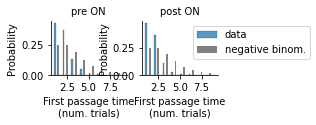

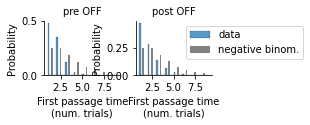

In [211]:

# xs=np.arange(1,nbin_max+1)
# nbpmf = scipy.stats.nbinom.pmf(n=xs,k=1,p=0.5)

# for onoff in [1,-1]:
#     fig=plt.figure(figsize=(3,1))
    
#     bins = np.arange(1,9.2,0.2)
# #     ax=sns.histplot(data=span_d_all.loc[onoff],x='trial span',bins=bins,ax=ax,stat='probability',label='data')
#     for ii,prepost in enumerate(['pre','post']):
#         ax=fig.add_subplot(1,2,ii+1)
#         ax=sns.histplot(data=span_d_all.loc[onoff],x=f'{prepost}_n_trial',bins=bins,ax=ax,stat='probability',label='data')
#         ax.bar(xs+0.5,nbpmf,width=0.2,label='negative binom.',color='grey')
#         sns.despine()
#         onoff_str = {1:'ON',-1:'OFF'}[onoff]
#         ax.set_title(prepost+' '+onoff_str)
# #         ax.set_xlabel('Switch duration\n(num. trials)')
#         ax.set_xlabel('First passage time\n(num. trials)')
    
# #     ax=fig.add_subplot(1,2,2)
# #     bins = np.arange(1,11,1)
# #     ax=sns.histplot(data=span_d_all.loc[onoff],x='trial span', bins=bins,ax=ax,cumulative=True,stat='probability',fill=False)
# #     ax.set_xlim([0.9,6.1])
# #     ax.set_xticks([1.5,3.5,5.5])
# #     ax.set_xticklabels([1,3,5])
# #     sns.despine()
# #     ax.set_xlabel('Switch duration\n(num. trials)')
# #     plt.tight_layout()
#     ax.legend(bbox_to_anchor=[0.6,1])
    
#     for k in range(1,5):
#         p=(span_d_all.loc[onoff]['trial span'] <=k).mean()
#         print(f'onoff {onoff}, <={k}: {p}')
    
#     figfn = f'hist_switch_duration_{onoff}'
# #     ph.save_given_name(fig,figfn,figdir)


In [184]:
nbin_max=40
xs=np.arange(1,nbin_max+1)
nbpmf = scipy.stats.nbinom.pmf(n=xs,k=1,p=0.5)
xx=span_d_all.loc[onoff]['trial span']
f_obs = np.histogram(xx,np.arange(1,nbin_max+2))[0]

In [185]:
f_exp = nbpmf * np.sum(f_obs)

In [186]:
f_exp.sum()

1582.9999999697661

In [187]:
f_obs.sum()

1583

In [188]:
scipy.stats.chisquare(f_obs,f_exp=f_exp)

Power_divergenceResult(statistic=73.12585740705698, pvalue=0.0007592472338423346)

onoff 1, <=1: 0.23586206896551723
onoff 1, <=2: 0.5880459770114943
onoff 1, <=3: 0.833103448275862
onoff 1, <=4: 0.9429885057471264
onoff -1, <=1: 0.31461538461538463
onoff -1, <=2: 0.6484615384615384
onoff -1, <=3: 0.8669230769230769
onoff -1, <=4: 0.9607692307692308


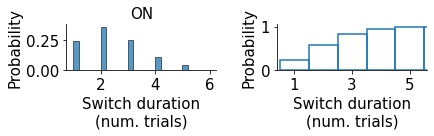

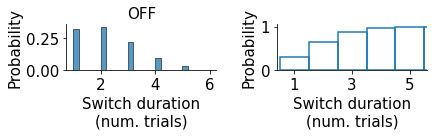

In [74]:

# for onoff in [1,-1]:
#     fig=plt.figure(figsize=(6,2))
#     ax=fig.add_subplot(1,2,1)
#     bins = np.arange(1,6.2,0.2)
#     ax=sns.histplot(data=span_d_all.loc[onoff],x='trial span',bins=bins,ax=ax,stat='probability')
#     sns.despine()
#     onoff_str = {1:'ON',-1:'OFF'}[onoff]
#     ax.set_title(onoff_str)
#     ax.set_xlabel('Switch duration\n(num. trials)')
    
#     ax=fig.add_subplot(1,2,2)
#     bins = np.arange(1,11,1)
#     ax=sns.histplot(data=span_d_all.loc[onoff],x='trial span', bins=bins,ax=ax,cumulative=True,stat='probability',fill=False)
#     ax.set_xlim([0.9,6.1])
#     ax.set_xticks([1.5,3.5,5.5])
#     ax.set_xticklabels([1,3,5])
#     sns.despine()
#     ax.set_xlabel('Switch duration\n(num. trials)')
#     plt.tight_layout()
    
#     for k in range(1,5):
#         p=(span_d_all.loc[onoff]['trial span'] <=k).mean()
#         print(f'onoff {onoff}, <={k}: {p}')
    
#     figfn = f'hist_switch_duration_{onoff}'
#     ph.save_given_name(fig,figfn,figdir)


# trial duration schematics

In [312]:
np.random.seed(0)
X_d={}
X_pwc_d = {}
n_trials = 20
X_ramp = np.zeros(n_trials)
X_ramp[5:15] = np.arange(10)
X_ramp[15:] = 10
X_ramp = X_ramp + np.random.normal(size=n_trials)
_,X_ramp_pwc = svga.fit_cpd_get_r2(X_ramp,1)
X_d['ramp'] = X_ramp
X_pwc_d['ramp'] = X_ramp_pwc

X_step = np.zeros(n_trials)
X_step[n_trials//2:] = 10
X_step = X_step + np.random.normal(size=n_trials)
_,X_step_pwc = svga.fit_cpd_get_r2(X_step,1)
X_d['step'] = X_step
X_pwc_d['step'] = X_step_pwc






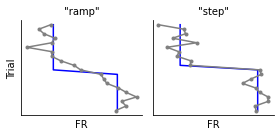

In [314]:
fig,axs=plt.subplots(1,2,figsize=(4,2))
for ii,k in enumerate(['ramp','step']):
    ax=axs[ii]
    ax.invert_yaxis()
    trial_inds = np.arange(len(X_d[k]))
    ax.plot(X_pwc_d[k],trial_inds,c='blue')
    ax.plot(X_d[k],trial_inds,c='grey',marker='o',ms=3)
    ax.set_title(f'"{k}"')
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax.set_xlabel('FR')
axs[0].set_ylabel('Trial')
plt.tight_layout()
figfn= 'switch_duration_schematics'
ph.save_given_name(fig,figfn,figdir)


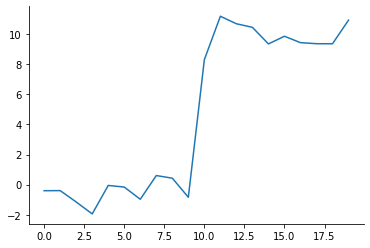

In [284]:
plt.plot(X_step)

## examples of trial span

In [77]:
ani = 'e15_13f1'
sess = 'e15_13f1_220117'

In [78]:
per_field_metrics_one=per_field_metrics_all.loc[ani,sess,ta]
fr_map_trial_df=fr_map_trial_df_all.loc[(ani,sess),:].dropna(axis=1,how='all')
X_raw = X_raw_all.loc[(ani,sess),:]
X_pwc=X_pwc_all.loc[(ani,sess),:]
all_sw_d=all_sw_d_all.loc[(ani,sess),:]
trial_index_to_index_within_df = dpp.trial_index_to_index_within_trialtype(spk_beh_df_all.loc[(ani,sess),:])

ind_given_si=per_field_metrics_one.query('si > 0.5').index
ta=0

/tmp/ipykernel_2060823/113494510.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  per_field_metrics_one=per_field_metrics_all.loc[ani,sess,ta]
/tmp/ipykernel_2060823/113494510.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  fr_map_trial_df=fr_map_trial_df_all.loc[(ani,sess),:].dropna(axis=1,how='all')
/tmp/ipykernel_2060823/113494510.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  X_raw = X_raw_all.loc[(ani,sess),:]
/tmp/ipykernel_2060823/113494510.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  X_pwc=X_pwc_all.loc[(ani,sess),:]
/tmp/ipykernel_2060823/113494510.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw_d=all_sw_d_all.loc[(ani,sess),:]
/tmp/ipykernel_2060823/113494510.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  trial_index_to_index_within_df = dpp.trial_index_to_index_within_trialty

In [83]:
from matplotlib.ticker import MaxNLocator

/tmp/ipykernel_2060823/2519829344.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  ma=span_d_all.loc[1,ani,sess,ta]['trial span']==ts
/tmp/ipykernel_2060823/2519829344.py:17: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_fields_recombined = all_fields_recombined_all.loc[ani,sess]
/mnt/home/szheng/projects/util_code/plot_helper.py:574: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_tick_labels, rotation=0)
/tmp/ipykernel_2060823/2519829344.py:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
/tmp/ipykernel_2060823/2519829344.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  ma=span_d_all.loc[1,ani,sess,ta]['trial span']==ts
/tmp/ipykernel_2060823/2519829344.py:17: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_

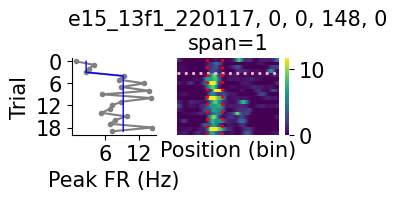

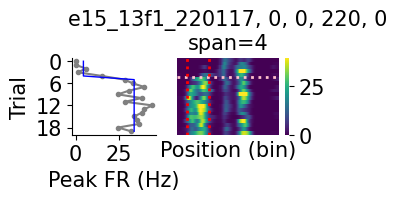

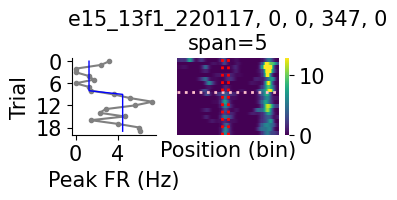

In [107]:
import plot_all_fr_map_x_pwc_one_session as plotfm
reload(plotfm)

dosave=True

ii_ts_l = [(2,1),(2,4),(0,5)] # which index, with a given trial span

for (ii,ts) in ii_ts_l:
    ma=span_d_all.loc[1,ani,sess,ta]['trial span']==ts
    ind_given_trialspan=ma.reset_index(level=-1,drop=True).index[ma]


    ind_left=ind_given_trialspan.intersection(ind_given_si)

    tt,uid,field_id=ind_left[ii]

    all_fields_recombined = all_fields_recombined_all.loc[ani,sess]
    all_fields_row_one=all_fields_recombined.loc[ta,tt,uid,field_id]

    fig,axs=plotfm.plot_ratemap_fr_one_field(all_fields_row_one,fr_map_trial_df,X_raw,X_pwc,all_sw_d,
                                trial_index_to_index_within_df,
                                save_fig_fn = None,
                                close_fig = False,
                                vmax_clip_quantile=0.99,
                                vmax_relative_to_field=False,
                                fig=None,axs=None,figsize=(3,1),do_legend=False,
                                             plot_kws={'ms':3.,'pwc_linewidth':1}
                                )
    title=f'{sess}, {ta}, {int(tt)}, {uid}, {field_id}\nspan={ts}'
    axs[1].set_title(title)
    axs[1].set_xticks([])
    axs[0].yaxis.set_major_locator(MaxNLocator(nbins=4,integer=True))
    axs[0].xaxis.set_major_locator(MaxNLocator(nbins=2,integer=True))
    plt.tight_layout()
    if dosave:
        figfn=f'switch_duration_ex_span{ts}_{ii}'
        ph.save_given_name(fig,figfn,figdir)



/tmp/ipykernel_858163/403635535.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  ma=span_d_all.loc[1,ani,sess,ta]['trial span']==ts
/tmp/ipykernel_858163/403635535.py:14: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_fields_recombined = all_fields_recombined_all.loc[ani,sess]
/tmp/ipykernel_858163/403635535.py:17: PerformanceWarning: indexing past lexsort depth may impact performance.
  fr_map_trial_df=fr_map_trial_df_all.loc[(ani,sess),:].dropna(axis=1,how='all')
/tmp/ipykernel_858163/403635535.py:18: PerformanceWarning: indexing past lexsort depth may impact performance.
  X_raw = X_raw_all.loc[(ani,sess),:]
/tmp/ipykernel_858163/403635535.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  X_pwc=X_pwc_all.loc[(ani,sess),:]
/tmp/ipykernel_858163/403635535.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw_d=all_sw_d_all.loc[(ani,sess),:]
/tmp/ipykernel_8581

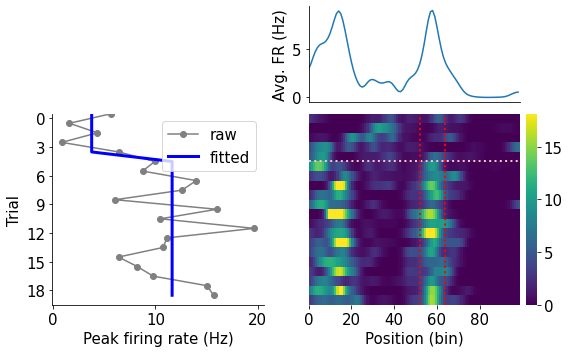

In [138]:
# # one example
# ii=9

# ta=0
# ts = 2

# ma=span_d_all.loc[1,ani,sess,ta]['trial span']==ts
# ind_given_trialspan=ma.reset_index(level=-1,drop=True).index[ma]
# ind_given_si=per_field_metrics_one.query('si > 0.5').index

# ind_left=ind_given_trialspan.intersection(ind_given_si)

# tt,uid,field_id=ind_left[ii]

# import plot_all_fr_map_x_pwc_one_session as plotfm
# all_fields_row_one=all_fields_recombined.loc[ta,tt,uid,field_id]

# fig,axs=plotfm.plot_ratemap_fr_one_field_avgfm(all_fields_row_one,fr_map_trial_df,X_raw,X_pwc,all_sw_d,
#                             trial_index_to_index_within_df,
#                             save_fig_fn = None,
#                             close_fig = False,
#                             vmax_clip_quantile=0.99,
#                             vmax_relative_to_field=False,
#                             fig=None,axs=None,figsize=(6*1.3,4*1.2)
#                             )


In [64]:
dd = '/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220119/py_data'
# dd = '/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data'
fn_test=os.path.join(dd,'sw_res_afterheadscan_fr_mean.p')
res_test=pickle.load(open(fn_test,'rb'))

In [67]:
gasam.main('/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220119/',force_reload=True,load_only=False,dosave=True)


/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220119/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220119/py_data/sw_res_afterheadscan_fr_mean.p exists; loading---


/mnt/home/szheng/projects/nmf_analysis/switch_metrics.py:119: RuntimeWarning: invalid value encountered in long_scalars
  N = N / segment_len
/mnt/home/szheng/projects/nmf_analysis/switch_metrics.py:119: RuntimeWarning: invalid value encountered in long_scalars
  N = N / segment_len
/mnt/home/szheng/projects/nmf_analysis/switch_metrics.py:119: RuntimeWarning: invalid value encountered in long_scalars
  N = N / segment_len
/mnt/home/szheng/projects/nmf_analysis/switch_metrics.py:119: RuntimeWarning: invalid value encountered in long_scalars
  N = N / segment_len
/mnt/home/szheng/projects/nmf_analysis/switch_metrics.py:119: RuntimeWarning: invalid value encountered in long_scalars
  N = N / segment_len


saved at /mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220119/py_data/switch_analysis/all_sw_info.p


{'all_sw_d':       trialtype  uid  field_index          time  speed_gauss  field_pos  \
 0 0        both  305            0   6918.271296     2.533582   3.740768   
   1        both   74            0   6970.094439    27.147425  20.859440   
   2        both  128            0   6963.678153     7.642066   3.039415   
   3         0.0   45            2   7097.330444    26.535218  95.875781   
   4         0.0  266            2   7078.870151    13.119677  67.115868   
 ...         ...  ...          ...           ...          ...        ...   
 1 217       1.0  319            3  22680.784099    22.570860  68.071959   
   218      both   84            0  22642.060494     8.713831   4.224583   
   219      both  276            0  22646.101542     3.707480   6.179972   
   220      both  283            0  22643.124781     2.112865   4.958388   
   221      both  312            0  22644.773936     1.997404   5.563925   
 
        trial_index  switch  index_within  switch_trial  switch_trial_frac

In [204]:
bad_sess=[]
for ddf in subdb['data_dir_full']:
    pfres_test=pfrc.main(ddf,dosave=False,force_reload=False,load_only=True)
    fr_mean=pfres_test['params_recombined'].loc['fr_mean']
    if not np.all(fr_mean.columns==fr_mean.sort_index(axis=1).columns):
        bad_sess.append(ddf)

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220118/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220119/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220120/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211019/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210328/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211116/py_data/place_field_after

<Axes: >

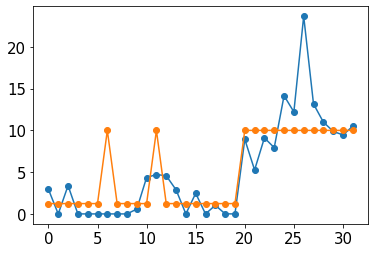

In [134]:
X_raw_all.loc[ani,sess,ta,tt,uid,field_id].dropna().plot(marker='o')
X_pwc_all.loc[ani,sess,ta,tt,uid,field_id].dropna().plot(marker='o')

## measure expected number of trial span
pre post difference (peri-switch valley peak FR difference) / sqrt(mean residual squared)



In [85]:
per_field_metrics_all['resid2_mean_sqrt'] = np.sqrt(per_field_metrics_all['resid2_mean'])

In [86]:
span_d_all_with_resid2 = span_d_all.reset_index(level=(0,-1)).join(per_field_metrics_all['resid2_mean_sqrt']).set_index(['onoff','level_7'],append=True).reorder_levels((-2,0,1,2,3,4,5,7))



In [94]:
expected_span = np.abs(span_d_all_with_resid2['post_minus_pre'] / (span_d_all_with_resid2['resid2_mean_sqrt'] *2)) 
span_d_all_with_resid2['expected_span'] = expected_span

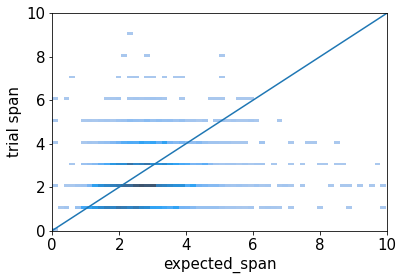

In [105]:
# ax=sns.scatterplot(data=span_d_all_with_resid2,x='expected_span',y='trial span',s=1)
ax=sns.histplot(data=span_d_all_with_resid2,x='expected_span',y='trial span')
ax.set_ylim([0,10])
ax.set_xlim([0,10])
ax.plot([0,1],[0,1],transform=ax.transAxes)

<Axes: >

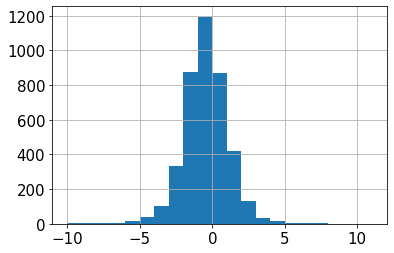

In [115]:
diff=span_d_all_with_resid2['trial span'] - span_d_all_with_resid2['expected_span']
bins=[-10,-5,0,5,10]
bins=np.arange(-10,10+2,1)
diff.hist(bins=bins)

In [117]:
diff.mean()/diff.std()

-0.2530544804668924

<Axes: >

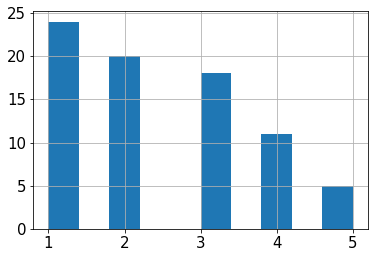

In [367]:
span_d_one.query('onoff==1')['trial span'].hist()

<Axes: >

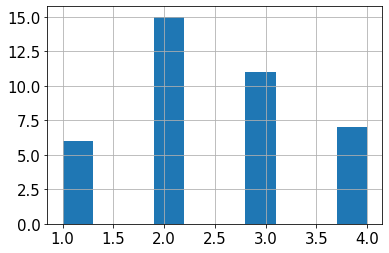

In [368]:
span_d_one.query('onoff==-1')['trial span'].hist()

In [327]:
import numpy as np
from scipy.optimize import curve_fit

def sigmoid(x, L ,x0, k):
    y = L / (1 + np.exp(-k*(x-x0)))
    return y

def fit_sigmoid(xdata, ydata):
    # Initial guess for the parameters
    initial_guess = [max(ydata), np.median(xdata), 1]

    # Curve fitting
    params, pcov = curve_fit(sigmoid, xdata, ydata, p0=initial_guess, method='dogbox')
    
    return params,pcov

# Example usage
xdata = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ydata = np.array([0.01, 0.03, 0.1, 0.2, 0.5, 0.8, 0.9, 0.97, 0.99, 0.999])

params,pcov = fit_sigmoid(xdata, ydata)
print("Fitted parameters: L = {}, x0 = {}, k = {}".format(*params))


Fitted parameters: L = 0.9934245468990771, x0 = 3.9845182675472732, k = 1.2706321891719363


[13.80321874  8.60388498  1.47781184]


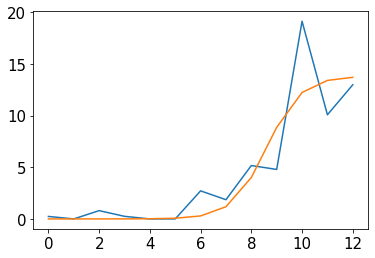

In [332]:
ydata=peri_sw_x_one.iloc[0]

xs=np.arange(len(ydata))
params,pcov=fit_sigmoid(xs,ydata.values)
y_hat=sigmoid(xs,*params)
plt.plot(xs,ydata)
plt.plot(xs,y_hat)
print(params)

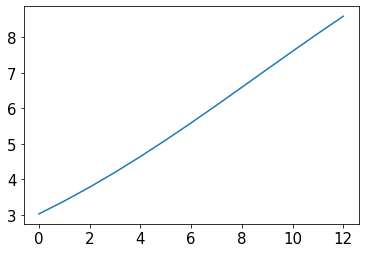

In [335]:
y_hat=sigmoid(xs,params[0],params[1],params[2]*0.1)

plt.plot(xs,y_hat)


In [280]:
peri_sw_x_one

,13,15,17,18,20,21,23,24,26,27
0,0.01155,0.0,0.0,9.564084,2.748094,14.884641,13.415141,11.795851,7.455039,13.696731


In [279]:
changes_df_row

0     0.0
2     0.0
4     0.0
6     0.0
11    0.0
12    0.0
13    0.0
15    0.0
17    0.0
18    0.0
20    0.0
21    1.0
23    0.0
24    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
Name: (32, 1), dtype: float64

[11.93902662  3.24395274  1.2759813 ]


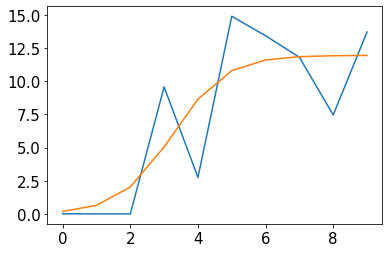

In [271]:
ydata=peri_sw_x_one.iloc[0][1:-1]

xs=np.arange(len(ydata))
params=fit_sigmoid(xs,peri_sw_x_one.iloc[0].values)
y_hat=sigmoid(xs,*params)
plt.plot(xs,ydata)
plt.plot(xs,y_hat)
print(params)

In [244]:
next_sw

20

In [250]:
peri_sw_x

,13,15,17,18,20,21,23,24,26,27
0,0.01155,0.0,0.0,9.564084,2.748094,14.884641,13.415141,11.795851,7.455039,13.696731


In [222]:
sw_trials

array([11])

In [210]:
X_pwc

0          1          2          3          4   \
0 0.0  31  1  11.860302        NaN  11.860302        NaN  11.860302   
       32  1   1.434035        NaN   1.434035        NaN   1.434035   
       34  0   4.093238        NaN   4.093238        NaN   4.093238   
       35  1   3.495219        NaN   3.495219        NaN   3.495219   
       36  0   8.683220        NaN   8.683220        NaN   8.683220   
...                 ...        ...        ...        ...        ...   
  both 363 0   7.453740   7.453740   7.453740   7.453740   7.453740   
       368 0   4.221207   4.221207   4.221207   4.221207   4.221207   
       370 0   1.875981   1.875981   1.875981   1.875981   1.875981   
       374 0  15.428028  15.428028  15.428028  15.428028  15.428028   
       376 0  16.181012  16.181012  16.181012  16.181012  16.181012   

                     5          6          7          8          9   ...  60  \
0 0.0  31  1        NaN  11.860302        NaN        NaN        NaN  ... NaN   
       32  1        NaN   1.434035        NaN        NaN        NaN  ... NaN   
       34  0        NaN   4.093238        NaN        NaN        NaN  ... NaN   
       35  1        NaN   3.495219        NaN        NaN        NaN  ... NaN   
       36  0        NaN   8.683220        NaN        NaN        NaN  ... NaN   
...                 ...        ...        ...        ...        ...  ...  ..   
  both 363 0   7.453740   7.453740   7.453740   7.453740   7.453740  ... NaN   
       368 0   4.221207   4.221207   4.221207   4.221207   4.221207  ... NaN   
       370 0   1.875981   1.875981   1.875981   1.875981   1.875981  ... NaN   
       374 0  15.428028  15.428028  15.428028  15.428028  15.428028  ... NaN   
       376 0  16.181012  16.181012  16.181012  16.181012   4.735479  ... NaN   

              61  62  63  64  65  66  67  68  69  
0 0.0  31  1 NaN NaN NaN NaN NaN NaN NaN NaN NaN  
       32  1 NaN NaN NaN NaN NaN NaN NaN NaN NaN  
       34  0 NaN NaN NaN NaN NaN NaN NaN NaN NaN  
       35  1 NaN NaN NaN NaN NaN NaN NaN NaN NaN  
       36  0 NaN NaN NaN NaN NaN NaN NaN NaN NaN  
...           ..  ..  ..  ..  ..  ..  ..  ..  ..  
  both 363 0 NaN NaN NaN NaN NaN NaN NaN NaN NaN  
       368 0 NaN NaN NaN NaN NaN NaN NaN NaN NaN  
       370 0 NaN NaN NaN NaN NaN NaN NaN NaN NaN  
       374 0 NaN NaN NaN NaN NaN NaN NaN NaN NaN  
       376 0 NaN NaN NaN NaN NaN NaN NaN NaN NaN  

[682 rows x 70 columns]

In [209]:
X_pwc_all

0          1          2   \
e13_26m1 e13_26m1_210913 0 0.0  3  0        NaN   1.389282        NaN   
                                27 0        NaN  33.067719        NaN   
                                29 0        NaN  10.396074        NaN   
                                   1        NaN  26.288630        NaN   
                                   2        NaN  17.481232        NaN   
...                                         ...        ...        ...   
e14_2m3  e14_2m3_201118  0 both 30 0   8.682727   8.682727   8.682727   
                                32 0  11.835044  11.835044  11.835044   
                                38 0   9.374712   9.374712   9.374712   
                                47 0   6.453665   6.453665   6.453665   
                                53 0   3.517027   3.517027   3.517027   

                                             3          4          5   \
e13_26m1 e13_26m1_210913 0 0.0  3  0   1.389282        NaN        NaN   
                                27 0  33.067719        NaN        NaN   
                                29 0  10.396074        NaN        NaN   
                                   1  26.288630        NaN        NaN   
                                   2  17.481232        NaN        NaN   
...                                         ...        ...        ...   
e14_2m3  e14_2m3_201118  0 both 30 0   8.682727   8.682727   8.682727   
                                32 0  11.835044  11.835044  11.835044   
                                38 0   9.374712   9.374712   9.374712   
                                47 0   6.453665   6.453665   6.453665   
                                53 0   3.517027   3.517027   3.517027   

                                             6          7          8   \
e13_26m1 e13_26m1_210913 0 0.0  3  0   1.389282        NaN   1.389282   
                                27 0  33.067719        NaN  33.067719   
                                29 0  10.396074        NaN  10.396074   
                                   1  26.288630        NaN  26.288630   
                                   2  17.481232        NaN  17.481232   
...                                         ...        ...        ...   
e14_2m3  e14_2m3_201118  0 both 30 0   8.682727   8.682727   8.682727   
                                32 0  11.835044  11.835044  11.835044   
                                38 0   9.374712   9.374712   9.374712   
                                47 0   6.453665   6.453665   6.453665   
                                53 0   3.517027   3.517027   3.517027   

                                             9   ...  60         61  62  \
e13_26m1 e13_26m1_210913 0 0.0  3  0        NaN  ... NaN   4.305191 NaN   
                                27 0        NaN  ... NaN  33.067719 NaN   
                                29 0        NaN  ... NaN   2.777060 NaN   
                                   1        NaN  ... NaN  26.288630 NaN   
                                   2        NaN  ... NaN  17.481232 NaN   
...                                         ...  ...  ..        ...  ..   
e14_2m3  e14_2m3_201118  0 both 30 0   8.682727  ... NaN        NaN NaN   
                                32 0  11.835044  ... NaN        NaN NaN   
                                38 0   9.374712  ... NaN        NaN NaN   
                                47 0   6.453665  ... NaN        NaN NaN   
                                53 0   3.517027  ... NaN        NaN NaN   

                                             63  64         65  66  67  \
e13_26m1 e13_26m1_210913 0 0.0  3  0   4.305191 NaN   4.305191 NaN NaN   
                                27 0  33.067719 NaN  33.067719 NaN NaN   
                                29 0   2.777060 NaN   2.777060 NaN NaN   
                                   1  26.288630 NaN  26.288630 NaN NaN   
                                   2  17.481232 NaN  17.481232 NaN NaN   
...                                         ...  ..        ...  ..  .